In [ ]:
# import matplotlib.pyplot as plt
# 

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam

# from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

# import cv2
# 

# import numpy as np

import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets, layers, models 

import seaborn as sns
import os
import random


In [ ]:
labels = ['NORMAL', 'PNEUMONIA']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                # data.append([resized_arr, class_num])
                data.append((resized_arr, class_num))
            except Exception as e:
                print(e)
    #return np.array(data)
    return data

In [ ]:
# Fetcing train and validation data.
train = get_data('./train')
val = get_data('./val')

In [ ]:
random.shuffle(train)
random.shuffle(val)

<Axes: xlabel='count'>

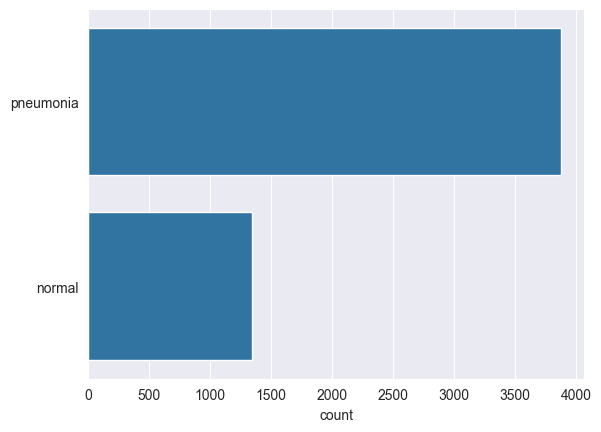

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("normal")
    else:
        l.append("pneumonia")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255 
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
class_names = ['Normal', 'Pneumonia']

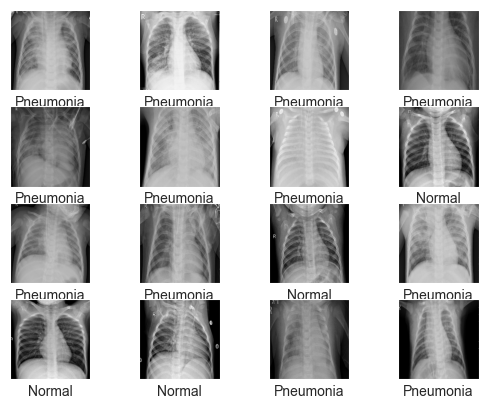

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # print(class_names[y_train[i]])
    plt.xlabel(class_names[y_train[i]])

plt.show()

In [ ]:
with tf.device('CPU'):
    x_train_tensor = tf.convert_to_tensor(x_train)
    x_val_tensor = tf.convert_to_tensor(x_val)
    y_train_tensor = tf.convert_to_tensor(y_train)
    y_val_tensor = tf.convert_to_tensor(y_val)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_tensor, y_train_tensor, epochs=10, validation_data=(x_val_tensor, y_val_tensor))

Epoch 1/10


ValueError: in user code:

    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\laerk\anaconda3\envs\py310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 224, 224, 3)
